In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
print('Import Successful')

Import Successful


In [2]:
dataFrame = pd.read_csv('../01-12/DrDoS_NTP.csv')

/home/bishal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataFrame.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN


In [4]:
dataFrame.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

### Unnamed column does not make sense so dropping that column

In [5]:
del dataFrame['Unnamed: 0']

In [6]:
dataFrame.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,9,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,0,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN


### Checking to see if there are any missing values

In [119]:
dataFrame.isna().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
 Idle Max            0
 Idle Min            0
SimillarHTTP         0
 Inbound             0
 Label               0
Length: 87, dtype: int64

In [8]:
dataFrame[' Label'].value_counts()

DrDoS_NTP    1202642
BENIGN         14365
Name:  Label, dtype: int64

### Pie Chart for Visualization

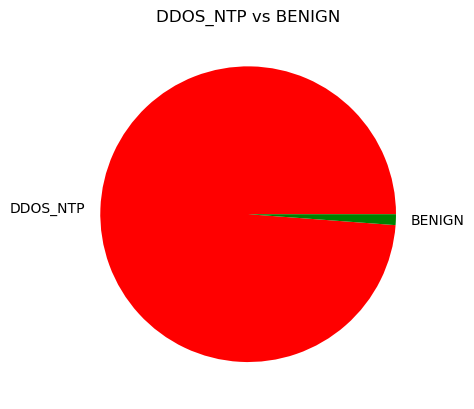

In [9]:
plt.rcdefaults()

DDOS_NTP = 1202642
BENIGN = 14365
values = [DDOS_NTP, BENIGN]
colors = ['r', 'g']
labels = ['DDOS_NTP', 'BENIGN']
plt.pie(values, colors=colors, labels=labels)
plt.title("DDOS_NTP vs BENIGN")
plt.show()

### Bar Graph for Visualization

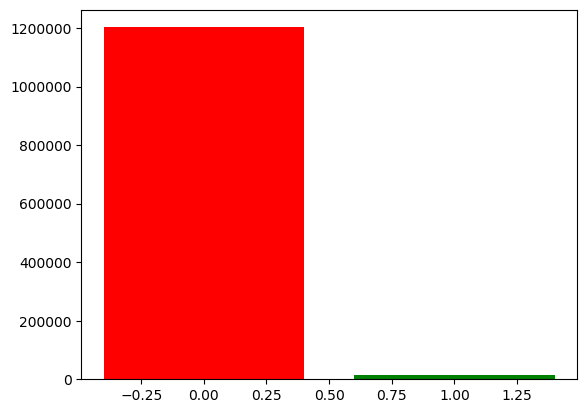

In [10]:
plt.bar(range(0, 2), values, color=colors)
plt.show()

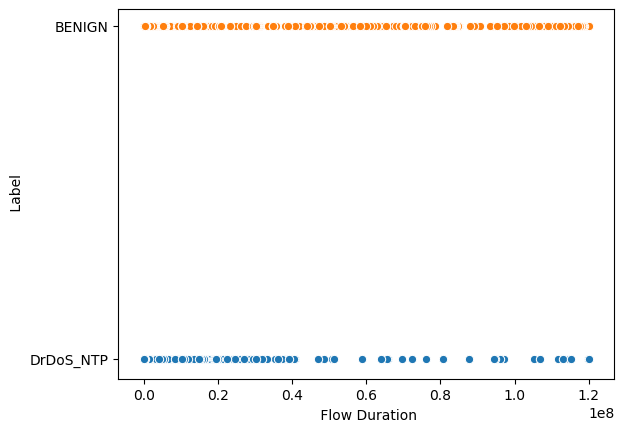

In [11]:
plt.figure()
NTP = dataFrame.loc[ dataFrame[' Label'] == 'DrDoS_NTP' ] 
Benign = dataFrame.loc[ dataFrame[' Label'] == 'BENIGN' ]

sn.scatterplot(NTP[' Flow Duration'], NTP[' Label'])
sn.scatterplot(Benign[' Flow Duration'], Benign[' Label'])

plt.show()

#### Since there appears to be no sign of missing values (good for us), we can move forward to do feature selection.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
print('sklearn import complete')

sklearn import complete


In [79]:
dataFrame.shape

(1217007, 87)

In [140]:
selectiveData = dataFrame.iloc[0:15000, 0:87]

In [141]:
selectiveData

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,9,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,0,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,192.168.50.6-74.208.236.171-56894-80-6,192.168.50.6,56894,74.208.236.171,80,6,2018-12-01 10:32:03.158095,7265476,2,8,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,BENIGN
14996,192.168.50.6-74.208.236.171-56895-80-6,192.168.50.6,56895,74.208.236.171,80,6,2018-12-01 10:32:03.158420,7265059,2,8,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,BENIGN
14997,192.168.50.6-74.208.236.171-56896-80-6,192.168.50.6,56896,74.208.236.171,80,6,2018-12-01 10:32:03.205062,7218413,2,8,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,BENIGN
14998,192.168.50.6-4.2.2.4-63060-53-17,192.168.50.6,63060,4.2.2.4,53,17,2018-12-01 10:32:03.207809,20698,2,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,BENIGN


In [142]:
alist = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'SimillarHTTP', 'Flow Bytes/s', ' Flow Packets/s']
for mem in alist:
    del selectiveData[mem]

In [143]:
selectiveData

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,60675,80,6,5220876,12,9,1928.0,4290.0,509.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1,DrDoS_NTP
1,60676,80,6,12644252,5,2,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1,DrDoS_NTP
2,443,50458,6,3,2,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1,BENIGN
3,443,50465,6,3,2,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1,BENIGN
4,0,0,0,114329232,52,0,0.0,0.0,0.0,0.0,...,7.416667,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,56894,80,6,7265476,2,8,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,BENIGN
14996,56895,80,6,7265059,2,8,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,BENIGN
14997,56896,80,6,7218413,2,8,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,BENIGN
14998,63060,53,17,20698,2,2,70.0,174.0,35.0,35.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,BENIGN


In [110]:
selectiveData.shape

(15000, 80)

In [111]:
X = selectiveData.loc[:, selectiveData.columns != ' Label']
y = selectiveData[' Label']

In [112]:
featureSelectUsingKBest = SelectKBest(score_func = f_classif, k=10)

In [113]:
featureSelectUsingKBest

SelectKBest(k=10, score_func=<function f_classif at 0x7f64068e9b90>)

In [114]:
import math

fit = featureSelectUsingKBest.fit(X, y)
adict = []
i=0
for col in X.columns:
    score = fit.scores_[i]
    i+=1
    if not math.isnan(float(score)):
        adict.append([col, score])    
    
adict.sort(key=lambda arr : float(arr[1]), reverse=True)

j = 1
print("Top 20 Features are: ")
print("{:>20} {:>20}".format('Feature', 'Weight'))
print("=" * 50)
for col, score in adict[:20]:
    print('{}\t{:>20}\t{}'.format(j, col, score))
    j+=1

Top 20 Features are: 
             Feature               Weight
1	 min_seg_size_forward	9007.72717148713
2	             Inbound	3871.0509269618337
3	            Protocol	1958.8682824571474
4	      CWE Flag Count	1793.1272106469175
5	         Source Port	1176.5583831253527
6	 Bwd Packet Length Min	1096.5587078565286
7	      URG Flag Count	536.7707401151636
8	      ACK Flag Count	422.3940556199715
9	   Min Packet Length	394.3495532730069
10	Init_Win_bytes_forward	381.3839232062604
11	       Fwd PSH Flags	331.27125332659074
12	      RST Flag Count	331.27125332659074
13	       Fwd IAT Total	205.29679490114515
14	 Fwd Packet Length Min	202.46287286494487
15	       Flow Duration	194.70348350477906
16	       Bwd IAT Total	193.00465233110654
17	       Fwd Packets/s	178.31913783467058
18	            Idle Max	177.19338572907603
19	           Idle Mean	170.50122422117565
20	            Idle Min	156.69452841594264


/home/bishal/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [31 32 33 43 46 50 56 57 58 59 60 61] are constant.
  UserWarning)
/home/bishal/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [115]:
from sklearn.feature_selection import SelectFpr

In [116]:
featureSelectUsingFpr = SelectFpr(score_func=f_classif, alpha=0.05)
fit = featureSelectUsingFpr.fit(X, y)
adict = []
i=0
for col in X.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        adict.append([col, score])    
    
adict.sort(key=lambda arr : float(arr[1]), reverse=True)


j=1
print("Top 20 Features are: ")
print("{:>20} {:>20}".format('Feature', 'Weight'))
print("=" * 50)
for col, score in adict[:20]:
    print('{}\t{:>20}\t{}'.format(j, col, score))
    j+=1

Top 20 Features are: 
             Feature               Weight
1	 min_seg_size_forward	9007.72717148713
2	             Inbound	3871.0509269618337
3	            Protocol	1958.8682824571474
4	      CWE Flag Count	1793.1272106469175
5	         Source Port	1176.5583831253527
6	 Bwd Packet Length Min	1096.5587078565286
7	      URG Flag Count	536.7707401151636
8	      ACK Flag Count	422.3940556199715
9	   Min Packet Length	394.3495532730069
10	Init_Win_bytes_forward	381.3839232062604
11	       Fwd PSH Flags	331.27125332659074
12	      RST Flag Count	331.27125332659074
13	       Fwd IAT Total	205.29679490114515
14	 Fwd Packet Length Min	202.46287286494487
15	       Flow Duration	194.70348350477906
16	       Bwd IAT Total	193.00465233110654
17	       Fwd Packets/s	178.31913783467058
18	            Idle Max	177.19338572907603
19	           Idle Mean	170.50122422117565
20	            Idle Min	156.69452841594264


/home/bishal/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [31 32 33 43 46 50 56 57 58 59 60 61] are constant.
  UserWarning)
/home/bishal/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Feature Visualization

In [117]:
df = selectiveData[[' Label', ' min_seg_size_forward', ' Inbound', ' CWE Flag Count', ' Source Port', ' Protocol']]
df.head()

,Label,min_seg_size_forward,Inbound,CWE Flag Count,Source Port,Protocol
0,DrDoS_NTP,32,1,0,60675,6
1,DrDoS_NTP,32,1,0,60676,6
2,BENIGN,20,1,0,443,6
3,BENIGN,20,1,0,443,6
4,BENIGN,0,0,0,0,0


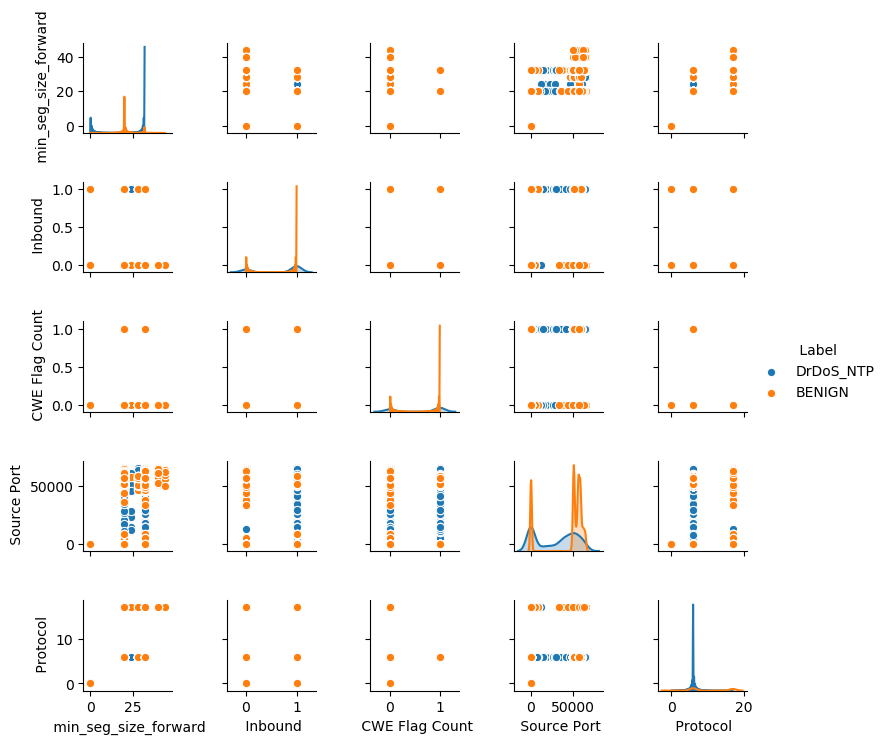

In [118]:
sn.pairplot(df, hue=' Label', height=1.5)

In [127]:
featuresList = []
for col, value in adict[:20]:
    featuresList.append(col)

In [128]:
featuresList

[' min_seg_size_forward',
 ' Inbound',
 ' Protocol',
 ' CWE Flag Count',
 ' Source Port',
 ' Bwd Packet Length Min',
 ' URG Flag Count',
 ' ACK Flag Count',
 ' Min Packet Length',
 'Init_Win_bytes_forward',
 'Fwd PSH Flags',
 ' RST Flag Count',
 'Fwd IAT Total',
 ' Fwd Packet Length Min',
 ' Flow Duration',
 'Bwd IAT Total',
 'Fwd Packets/s',
 ' Idle Max',
 'Idle Mean',
 ' Idle Min']

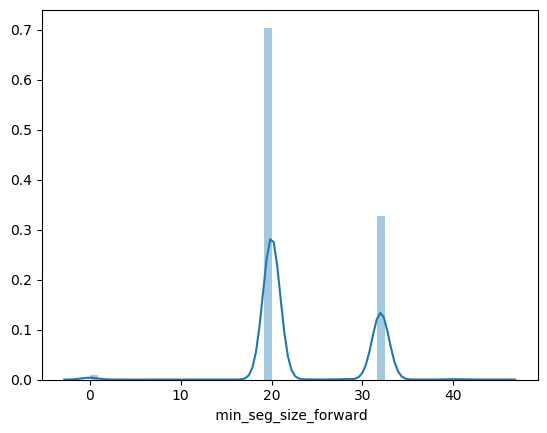

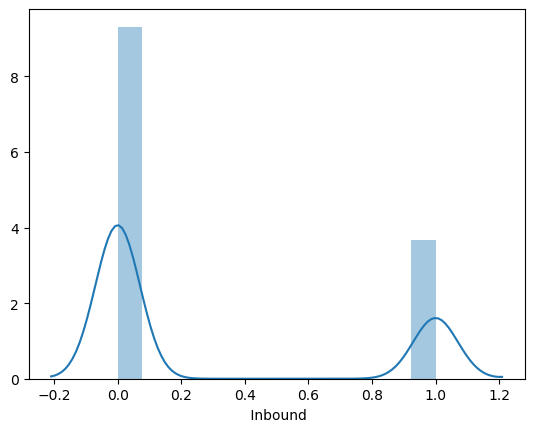

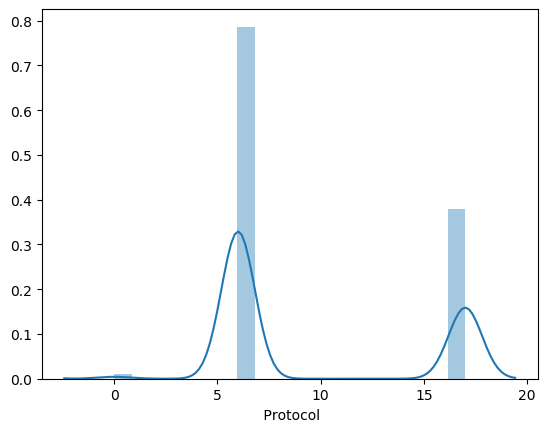

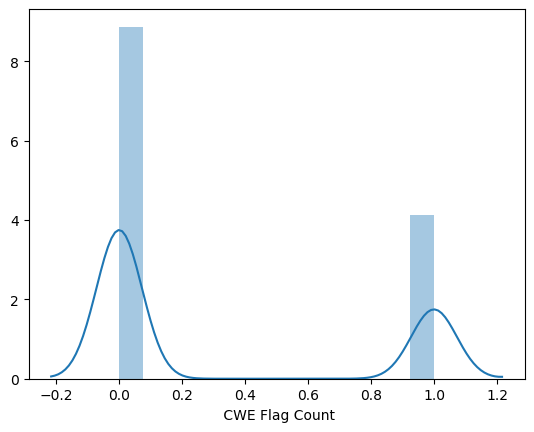

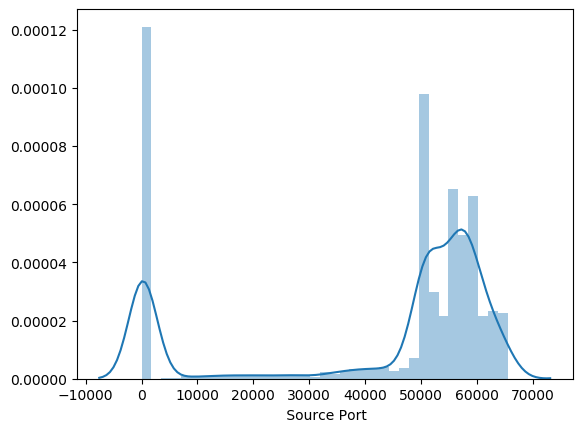

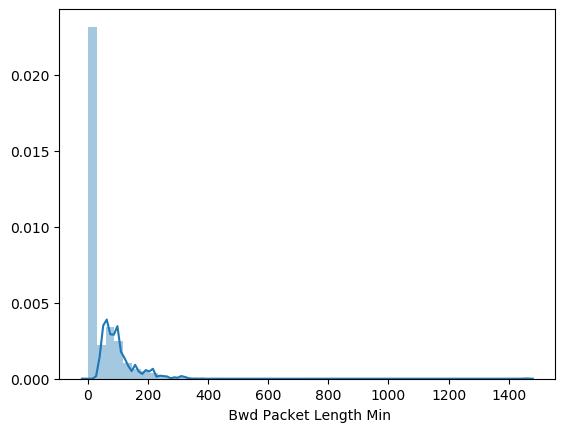

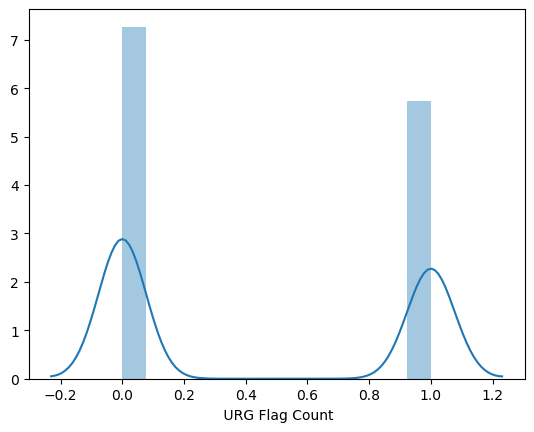

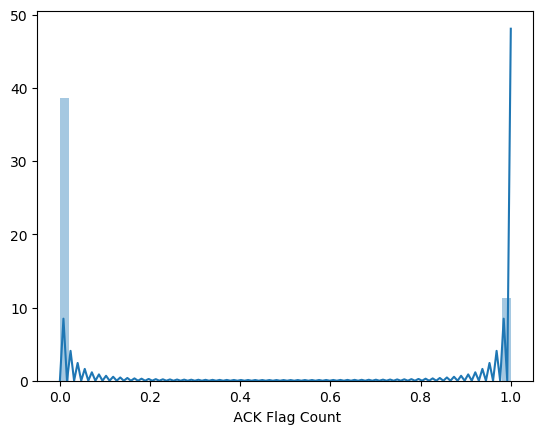

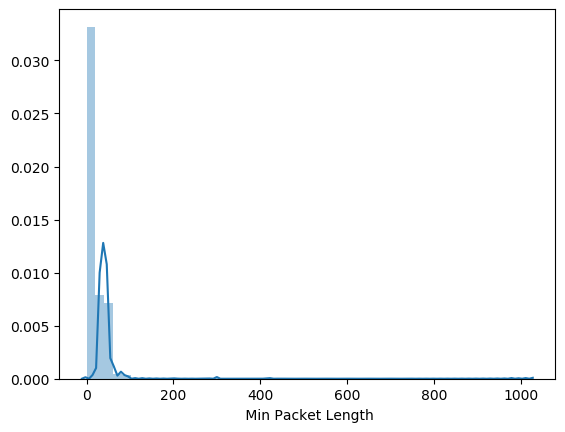

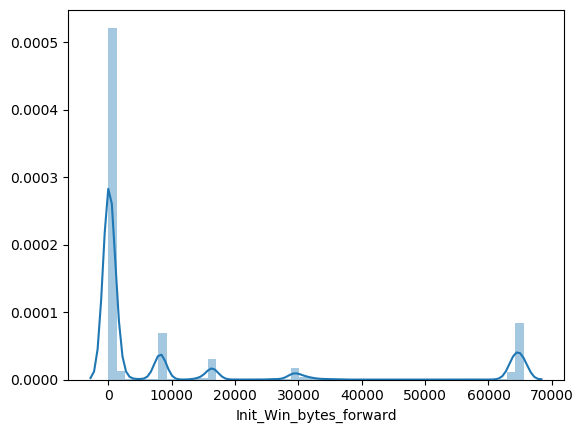

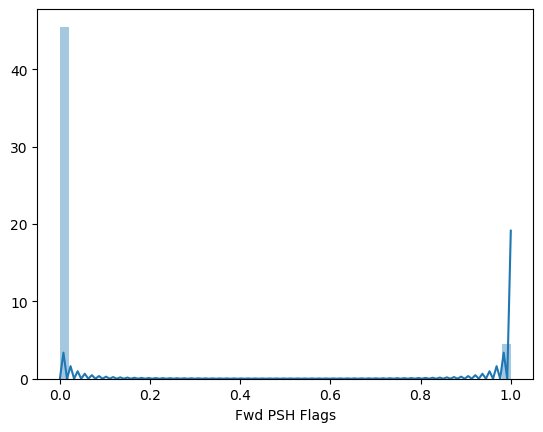

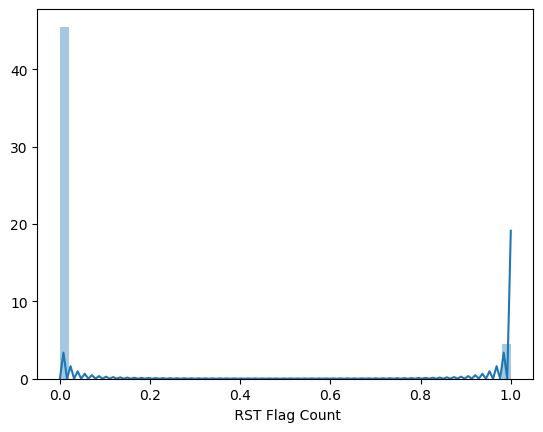

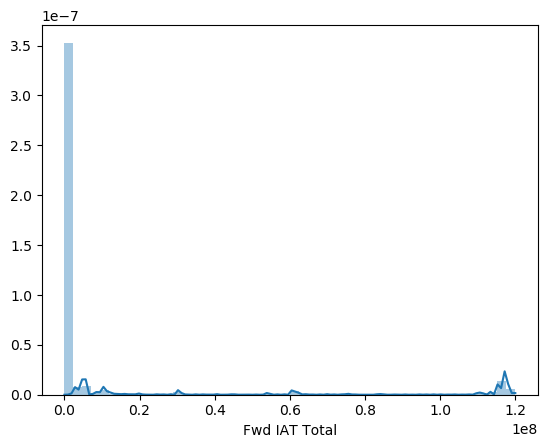

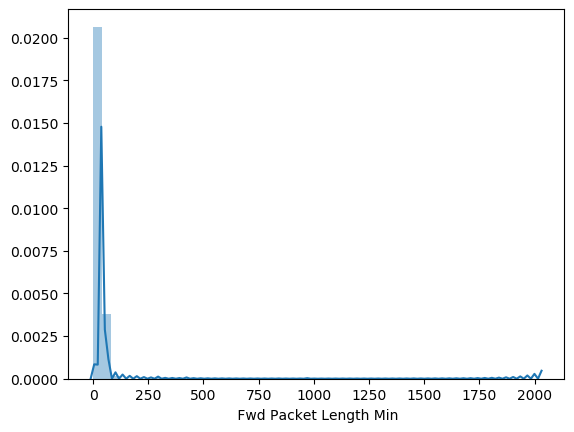

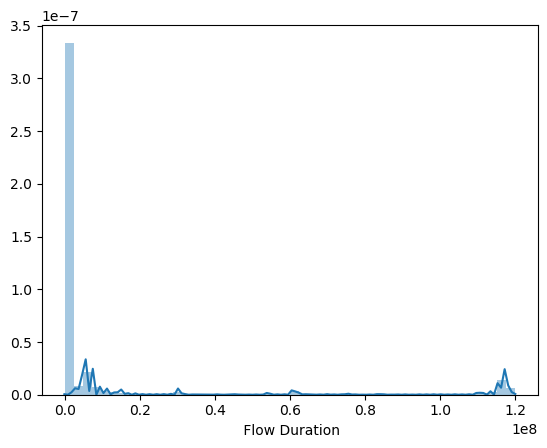

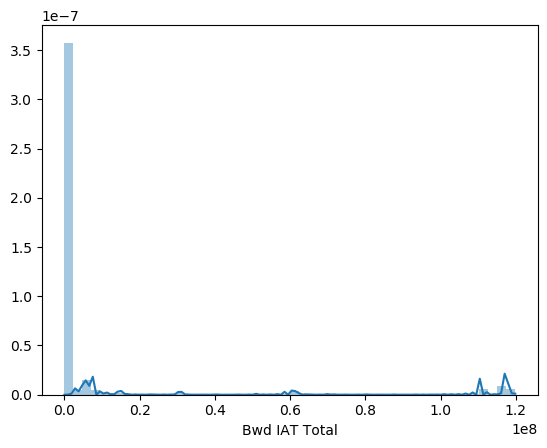

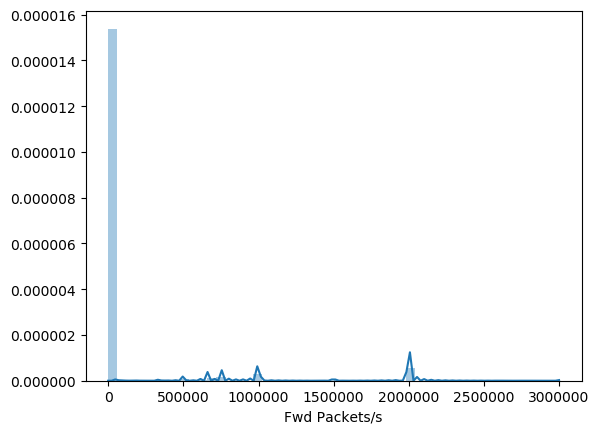

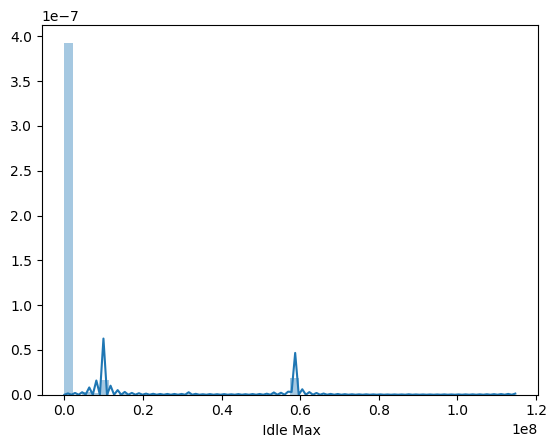

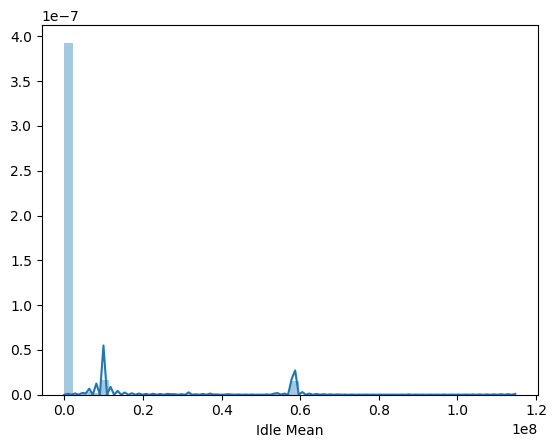

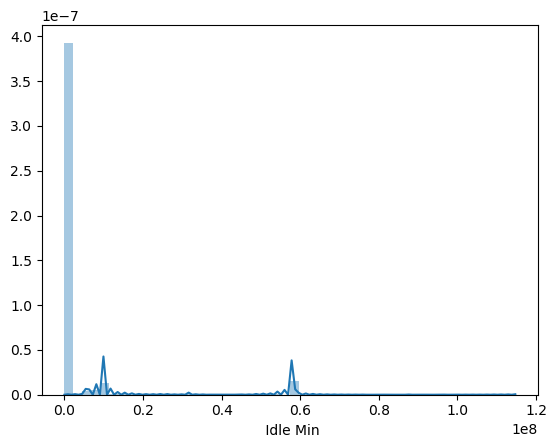

In [133]:
for mem in featuresList:
    sn.distplot(selectiveData[mem])
    plt.show()

# Saving those features in a new file named "Cleaned_Dataset.csv"

In [152]:
featuresList.append(" Label")
for mem in dataFrame.columns:
    if mem not in featuresList:
        del dataFrame[mem]        

In [153]:
dataFrame

,Source Port,Protocol,Flow Duration,Fwd Packet Length Min,Bwd Packet Length Min,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,...,ACK Flag Count,URG Flag Count,CWE Flag Count,Init_Win_bytes_forward,min_seg_size_forward,Idle Mean,Idle Max,Idle Min,Inbound,Label
0,60675,6,5220876,0.0,0.0,215957.0,5220754.0,0,2.298465,0.0,...,1,0,0,65535,32,0.0,0.0,0.0,1,DrDoS_NTP
1,60676,6,12644252,0.0,0.0,12644252.0,1.0,0,0.395437,0.0,...,1,0,0,65535,32,0.0,0.0,0.0,1,DrDoS_NTP
2,443,6,3,0.0,0.0,3.0,0.0,0,666666.666667,0.0,...,0,1,0,0,20,0.0,0.0,0.0,1,BENIGN
3,443,6,3,0.0,0.0,3.0,0.0,0,666666.666667,0.0,...,0,1,0,0,20,0.0,0.0,0.0,1,BENIGN
4,0,0,114329232,0.0,0.0,114329232.0,0.0,0,0.454827,0.0,...,0,0,0,-1,0,9527428.0,9950741.0,9092248.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217002,634,17,37146,440.0,0.0,37146.0,0.0,0,5384.159802,440.0,...,0,0,0,-1,20,0.0,0.0,0.0,1,DrDoS_NTP
1217003,634,17,42011,440.0,0.0,42011.0,0.0,0,4760.657923,440.0,...,0,0,0,-1,20,0.0,0.0,0.0,1,DrDoS_NTP
1217004,634,17,40375,440.0,0.0,40375.0,0.0,0,4953.560372,440.0,...,0,0,0,-1,20,0.0,0.0,0.0,1,DrDoS_NTP
1217005,634,17,59116,440.0,0.0,59116.0,0.0,0,3383.178835,440.0,...,0,0,0,-1,20,0.0,0.0,0.0,1,DrDoS_NTP


In [154]:
dataFrame.to_csv('Cleaned_Dataset.csv')